# Making a basic torch neural net

In an attempt to learn how to use the torch library and neural nets in general, let's aim for a proficiency rate of 80%.

In [10]:
# import our libraries
import numpy as np, torch, matplotlib.pyplot as plt, gzip

In [44]:
# read in our files
files = ["train-images-idx3-ubyte.gz", 
         "train-labels-idx1-ubyte.gz", 
         "t10k-images-idx3-ubyte.gz", 
         "t10k-labels-idx1-ubyte.gz"]
files = ["data/" + file for file in files]

 Each feature vector (row in the feature matrix) consists of 784 pixels (intensities) 
-- unrolled from the original 28x28 pixels images.   
In order to read in these images and show them, we need to reshape our np arrays.   
The first 16 indicies (0x10 as hexadecimal) are likely redundant info, when removed allow us to reshape

In [47]:
X_train = np.frombuffer(gzip.decompress(open(files[0], "rb").read()), dtype=np.uint8)[0x10:].reshape((-1,28,28))
Y_train = np.frombuffer(gzip.decompress(open(files[1], "rb").read()), dtype=np.uint8)[8:]
X_test = np.frombuffer(gzip.decompress(open(files[2], "rb").read()), dtype=np.uint8)[0x10:].reshape((-1,28,28))
Y_test = np.frombuffer(gzip.decompress(open(files[3], "rb").read()), dtype=np.uint8)[8:]

<function matplotlib.pyplot.show(close=None, block=None)>

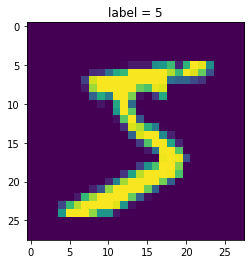

In [69]:
# confirm we can show images and that the X and Y array are aligned.
plt.figure(figsize=(8,4))
im = plt.imshow(X_train[0]) # first image
plt.title("label = " + str(Y_train[0])) # first label
plt.show